<a href="https://colab.research.google.com/github/AndrewMarksArt/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module2-loadingdata/LS_DS_112_Loading_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Loading, Cleaning and Visualizing Data

Objectives for today:
- Load data from multiple sources into a Python notebook 
 - !curl method
 - CSV upload method
- Create basic plots appropriate for different data types
 - Scatter Plot
 - Histogram
 - Density Plot
 - Pairplot
- "Clean" a dataset using common Python libraries
 - Removing NaN values "Interpolation"

# Part 1 - Loading Data

Data comes in many shapes and sizes - we'll start by loading tabular data, usually in csv format.

Data set sources:

- https://archive.ics.uci.edu/ml/datasets.php
- https://github.com/awesomedata/awesome-public-datasets
- https://registry.opendata.aws/ (beyond scope for now, but good to be aware of)

Let's start with an example - [data about flags](https://archive.ics.uci.edu/ml/datasets/Flags).

## Lecture example - flag data

In [1]:
# Step 1 - find the actual file to download

# From navigating the page, clicking "Data Folder"
flag_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data'

# You can "shell out" in a notebook for more powerful tools
# https://jakevdp.github.io/PythonDataScienceHandbook/01.05-ipython-and-shell-commands.html

# Funny extension, but on inspection looks like a csv
!curl -s $flag_data_url | tail -n 5

# Extensions are just a norm! You have to inspect to be sure what something is

Western-Samoa,6,3,3,0,1,1,0,0,3,1,0,1,0,1,0,0,red,0,0,0,1,5,0,0,0,0,0,blue,red
Yugoslavia,3,1,256,22,6,6,0,3,4,1,0,1,1,1,0,0,red,0,0,0,0,1,0,0,0,0,0,blue,red
Zaire,4,2,905,28,10,5,0,0,4,1,1,0,1,0,0,1,green,1,0,0,0,0,0,0,1,1,0,green,green
Zambia,4,2,753,6,10,5,3,0,4,1,1,0,0,0,1,1,green,0,0,0,0,0,0,0,0,1,0,green,brown
Zimbabwe,4,2,391,8,10,5,0,7,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,1,1,1,0,green,green


In [0]:
# Step 2 - load the data

# How to deal with a csv? 🐼
import pandas as pd
flag_data = pd.read_csv(flag_data_url)

In [3]:
# Step 3 - verify we've got *something*
flag_data.head()

Afghanistan  5  1   648  16  10  2  0  3  5.1  ...  0.5  0.6  1.6  0.7  \
0         Albania  3  1    29   3   6  6  0  0    3  ...    0    0    1    0   
1         Algeria  4  1  2388  20   8  2  2  0    3  ...    0    0    1    1   
2  American-Samoa  6  3     0   0   1  1  0  0    5  ...    0    0    0    0   
3         Andorra  3  1     0   0   6  0  3  0    3  ...    0    0    0    0   
4          Angola  4  2  1247   7  10  5  0  2    3  ...    0    0    1    0   

   0.8  1.7  0.9 0.10  black  green.1  
0    0    0    1    0    red      red  
1    0    0    0    0  green    white  
2    1    1    1    0   blue      red  
3    0    0    0    0   blue      red  
4    0    1    0    0    red    black  

[5 rows x 30 columns]

In [4]:
# Step 4 - Looks a bit odd - verify that it is what we want
flag_data.count()

Afghanistan    193
5              193
1              193
648            193
16             193
10             193
2              193
0              193
3              193
5.1            193
1.1            193
1.2            193
0.1            193
1.3            193
1.4            193
1.5            193
0.2            193
green          193
0.3            193
0.4            193
0.5            193
0.6            193
1.6            193
0.7            193
0.8            193
1.7            193
0.9            193
0.10           193
black          193
green.1        193
dtype: int64

In [5]:
!curl -s https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data | wc -l

194


In [6]:
# So we have 193 observations with funny names, file has 194 rows
# Looks like the file has no header row, but read_csv assumes it does
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file into DataFrame.
    
    Also supports option

In [0]:
?pd.read_csv

In [0]:
??pd.read_csv

In [9]:
# Alright, we can pass header=None to fix this
flag_data = pd.read_csv(flag_data_url, header=None)
flag_data.head()

0   1   2     3   4   5   6   7   8   9   ...  20  21  22  23  \
0     Afghanistan   5   1   648  16  10   2   0   3   5  ...   0   0   1   0   
1         Albania   3   1    29   3   6   6   0   0   3  ...   0   0   1   0   
2         Algeria   4   1  2388  20   8   2   2   0   3  ...   0   0   1   1   
3  American-Samoa   6   3     0   0   1   1   0   0   5  ...   0   0   0   0   
4         Andorra   3   1     0   0   6   0   3   0   3  ...   0   0   0   0   

   24  25  26 27     28     29  
0   0   1   0  0  black  green  
1   0   0   1  0    red    red  
2   0   0   0  0  green  white  
3   1   1   1  0   blue    red  
4   0   0   0  0   blue    red  

[5 rows x 30 columns]

In [10]:
flag_data.count()

0     194
1     194
2     194
3     194
4     194
5     194
6     194
7     194
8     194
9     194
10    194
11    194
12    194
13    194
14    194
15    194
16    194
17    194
18    194
19    194
20    194
21    194
22    194
23    194
24    194
25    194
26    194
27    194
28    194
29    194
dtype: int64

In [11]:
flag_data.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

In [12]:
flag_data.shape

(194, 30)

In [0]:
pd.set_option('display.max_columns', 31)

In [16]:
column_headers = ['name', 'landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 'stripes', 'colors', 'red', 'green', 'blue',
                 'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 
                 'icon', 'animate','text', 'topleft', 'botright']
len(column_headers)

30

In [20]:
flag_data.columns = column_headers
flag_data.head()

name  landmass  zone  area  population  language  religion  bars  \
0     Afghanistan         5     1   648          16        10         2     0   
1         Albania         3     1    29           3         6         6     0   
2         Algeria         4     1  2388          20         8         2     2   
3  American-Samoa         6     3     0           0         1         1     0   
4         Andorra         3     1     0           0         6         0     3   

   stripes  colors  red  green  blue  gold  white  black  orange mainhue  \
0        3       5    1      1     0     1      1      1       0   green   
1        0       3    1      0     0     1      0      1       0     red   
2        0       3    1      1     0     0      1      0       0   green   
3        0       5    1      0     1     1      1      0       1    blue   
4        0       3    1      0     1     1      0      0       0    gold   

   circles  crosses  saltires  quarters  sunstars  crescent  triangle  icon  \
0        0        0         0         0         1         0         0     1   
1        0        0         0         0         1         0         0     0   
2        0        0         0         0         1         1         0     0   
3        0        0         0         0         0         0         1     1   
4        0        0         0         0         0         0         0     0   

   animate  text topleft botright  
0        0     0   black    green  
1        1     0     red      red  
2        0     0   green    white  
3        1     0    blue      red  
4        0     0    blue      red

### Yes, but what does it *mean*?

This data is fairly nice - it was "donated" and is already "clean" (no missing values). But there are no variable names - so we have to look at the codebook (also from the site).

```
1. name: Name of the country concerned
2. landmass: 1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania
3. zone: Geographic quadrant, based on Greenwich and the Equator; 1=NE, 2=SE, 3=SW, 4=NW
4. area: in thousands of square km
5. population: in round millions
6. language: 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others
7. religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others
8. bars: Number of vertical bars in the flag
9. stripes: Number of horizontal stripes in the flag
10. colours: Number of different colours in the flag
11. red: 0 if red absent, 1 if red present in the flag
12. green: same for green
13. blue: same for blue
14. gold: same for gold (also yellow)
15. white: same for white
16. black: same for black
17. orange: same for orange (also brown)
18. mainhue: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)
19. circles: Number of circles in the flag
20. crosses: Number of (upright) crosses
21. saltires: Number of diagonal crosses
22. quarters: Number of quartered sections
23. sunstars: Number of sun or star symbols
24. crescent: 1 if a crescent moon symbol present, else 0
25. triangle: 1 if any triangles present, 0 otherwise
26. icon: 1 if an inanimate image present (e.g., a boat), otherwise 0
27. animate: 1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise
28. text: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise
29. topleft: colour in the top-left corner (moving right to decide tie-breaks)
30. botright: Colour in the bottom-left corner (moving left to decide tie-breaks)
```

Exercise - read the help for `read_csv` and figure out how to load the data with the above variable names. One pitfall to note - with `header=None` pandas generated variable names starting from 0, but the above list starts from 1...

## Loading from a local CSV to Google Colab

In [0]:
from google.colab import files as colab_files
colab_files.upload()

In [31]:
df = pd.read_csv('processed.cleveland.data', header=None)
df.head()

0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0

In [32]:
df.rename(columns = {0: 'age', 1: 'sex', 2: 'cp'}, inplace=True)
df.head()


age  sex   cp      3      4    5    6      7    8    9   10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0

In [33]:
column_names = ['age', 'sex', 'pain', 'BP', 'chol', 'fbs', 'ecg', 'maxhr', 'eiang', 'eist', 'slope', 'vessels', 'thal', 'diagnosis']
df.columns = column_names
df.head()

age  sex  pain     BP   chol  fbs  ecg  maxhr  eiang  eist  slope vessels  \
0  63.0  1.0   1.0  145.0  233.0  1.0  2.0  150.0    0.0   2.3    3.0     0.0   
1  67.0  1.0   4.0  160.0  286.0  0.0  2.0  108.0    1.0   1.5    2.0     3.0   
2  67.0  1.0   4.0  120.0  229.0  0.0  2.0  129.0    1.0   2.6    2.0     2.0   
3  37.0  1.0   3.0  130.0  250.0  0.0  0.0  187.0    0.0   3.5    3.0     0.0   
4  41.0  0.0   2.0  130.0  204.0  0.0  2.0  172.0    0.0   1.4    1.0     0.0   

  thal  diagnosis  
0  6.0          0  
1  3.0          2  
2  7.0          1  
3  3.0          0  
4  3.0          0

# Part 2 - Basic Visualizations

## Basic Data Visualizations Using Matplotlib

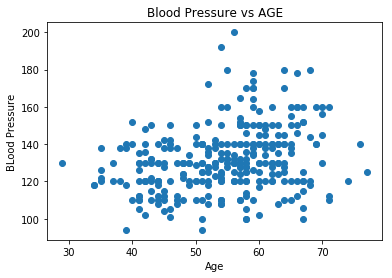

In [35]:
import matplotlib.pyplot as plt

# Scatter Plot
plt.scatter(df['age'], df['BP'])
plt.title('Blood Pressure vs AGE')
plt.xlabel('Age')
plt.ylabel("BLood Pressure")
plt.show()

Text(0.5, 1.0, 'Age Historgram')

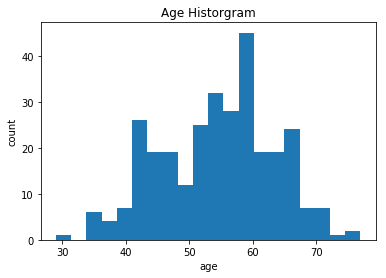

In [36]:
# Histogram
plt.hist(df['age'], bins=20)
plt.xlabel('age')
plt.ylabel('count')
plt.title('Age Historgram')


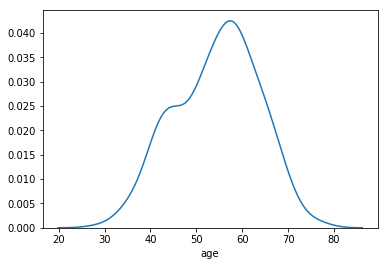

In [37]:
# Seaborn Density Plot
import seaborn as sns

sns.distplot(df['age'], hist=False)

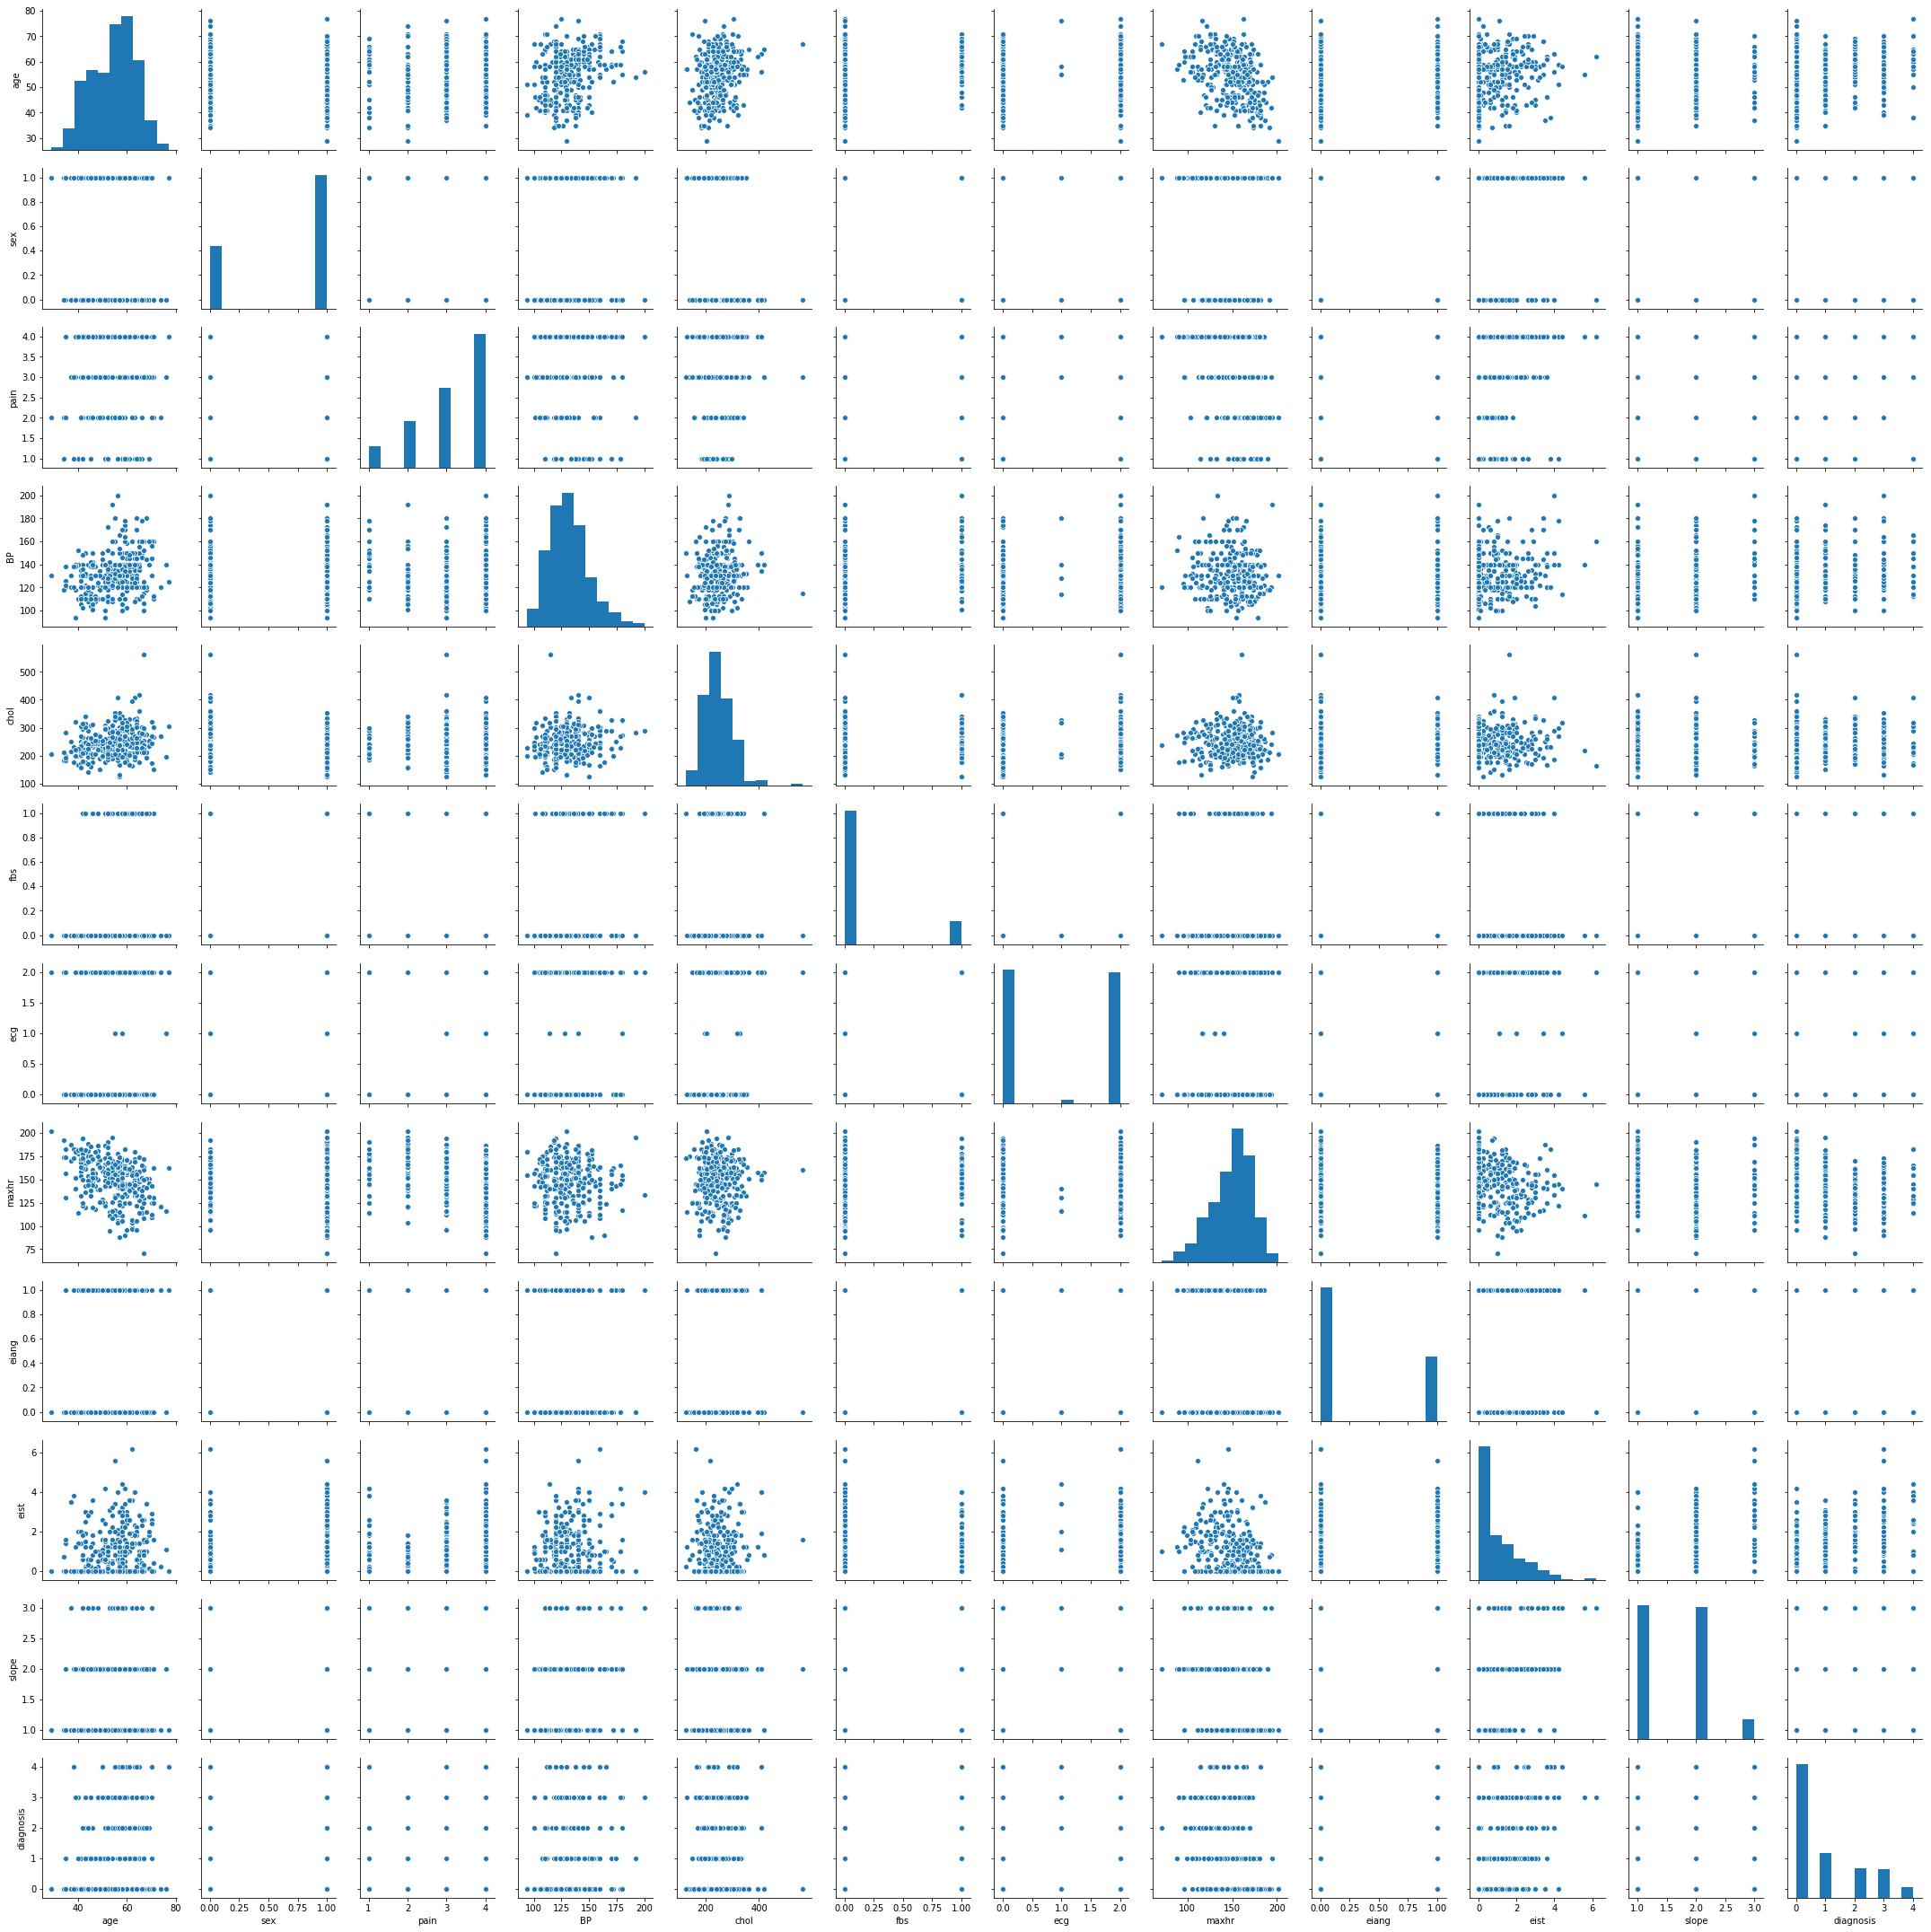

In [38]:
# Seaborn Pairplot
sns.pairplot(df)

## Create the same basic Visualizations using Pandas

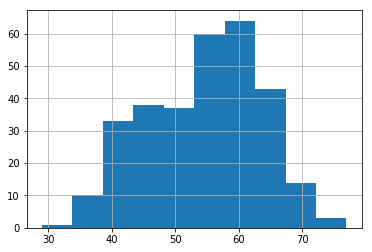

In [39]:
# Pandas Histogram - Look familiar?
df['age'].hist()

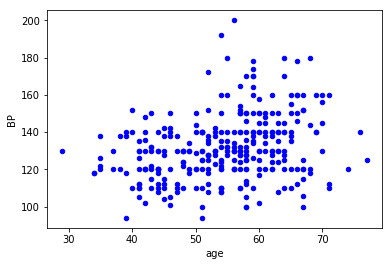

In [41]:
# Pandas Scatterplot
df.plot.scatter(x='age', y='BP', c='b')

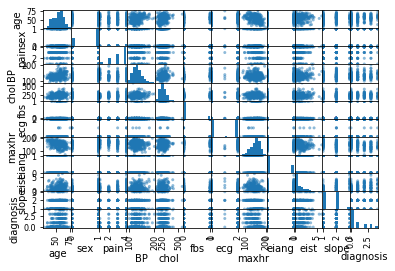

In [42]:
# Pandas Scatter Matrix - Usually doesn't look too great.
from pandas.plotting import scatter_matrix

scatter_matrix(df)
plt.show()

In [43]:
import bokeh

bokeh.__version__

'1.0.4'

In [0]:
import plotly

# Part 3 - Deal with Missing Values

## Diagnose Missing Values

Lets use the Adult Dataset from UCI. <https://github.com/ryanleeallred/datasets>

In [45]:
df1 = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv')
df1.head(5)

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week         country  salary  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

## Fill Missing Values

In [46]:
df1.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [47]:
df1['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=' ?')

In [49]:
df1.shape

(32561, 15)

In [0]:
df1 = df1.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

In [51]:
df1['country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

## Your assignment - pick a dataset and do something like the above

This is purposely open-ended - you can pick any data set you wish. It is highly advised you pick a dataset from UCI or a similar semi-clean source. You don't want the data that you're working with for this assignment to have any bigger issues than maybe not having headers or including missing values, etc.

After you have chosen your dataset, do the following:

- Import the dataset using the method that you are least comfortable with (!curl or CSV upload).
 - Make sure that your dataset has the number of rows and columns that you expect.
 - Make sure that your dataset has appropriate column names, rename them if necessary.
 - If your dataset uses markers like "?" to indicate missing values, replace them with NaNs during import.
- Identify and fill missing values in your dataset (if any)
 - Don't worry about using methods more advanced than the `.fillna()` function for today.
- Create one of each of the following plots using your dataset
 - Scatterplot
 - Histogram
 - Density Plot
 - Pairplot (note that pairplots will take a long time to load with large datasets or datasets with many columns)

If you get that done and want to try more challenging or exotic things, go for it! Use documentation as illustrated above, and follow the 20-minute rule (that is - ask for help if you're stuck!).

If you have loaded a few traditional datasets, see the following section for suggested stretch goals.

In [54]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

travel_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00485/google_review_ratings.csv'
!curl -s $travel_data_url | tail -n 5

User 5452,0.91,5,4,2.79,2.77,2.57,2.43,1.09,1.77,1.04,1.02,1.06,1.29,1.29,5,0.66,0.65,0.66,0.69,5,1.05,5,5,1.56,
User 5453,0.93,5,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,1.01,1.04,1.27,1.27,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5,5,1.09,
User 5454,0.94,5,4.03,2.8,2.78,2.57,1.75,1.05,1.75,1,0.99,1,1.08,1.25,0.87,0.65,0.63,0.64,0.74,5,1.07,5,5,1.11,
User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,0.97,0.98,1.06,1.23,5,0.64,0.63,0.64,0.75,5,1.08,5,5,1.12,
User 5456,0.95,4.07,5,2.82,2.8,2.57,2.42,1.02,1.74,0.96,0.95,0.96,1.01,1.21,0.85,0.64,0.62,0.63,0.78,5,1.08,5,5,1.17,


In [57]:
df =  pd.read_csv(travel_data_url)
df.head()

User  Category 1  Category 2  Category 3  Category 4  Category 5  \
0  User 1         0.0         0.0        3.63        3.65         5.0   
1  User 2         0.0         0.0        3.63        3.65         5.0   
2  User 3         0.0         0.0        3.63        3.63         5.0   
3  User 4         0.0         0.5        3.63        3.63         5.0   
4  User 5         0.0         0.0        3.63        3.63         5.0   

   Category 6  Category 7  Category 8  Category 9  Category 10 Category 11  \
0        2.92         5.0        2.35        2.33         2.64         1.7   
1        2.92         5.0        2.64        2.33         2.65         1.7   
2        2.92         5.0        2.64        2.33         2.64         1.7   
3        2.92         5.0        2.35        2.33         2.64        1.73   
4        2.92         5.0        2.64        2.33         2.64         1.7   

   Category 12  Category 13  Category 14  Category 15  Category 16  \
0         1.69          1.7         1.72         1.74         0.59   
1         1.69          1.7         1.72         1.74         0.59   
2         1.69          1.7         1.72         1.74         0.59   
3         1.69          1.7         1.72         1.74         0.59   
4         1.69          1.7         1.72         1.74         0.59   

   Category 17  Category 18  Category 19  Category 20  Category 21  \
0          0.5          0.0          0.5          0.0          0.0   
1          0.5          0.0          0.5          0.0          0.0   
2          0.5          0.0          0.5          0.0          0.0   
3          0.5          0.0          0.5          0.0          0.0   
4          0.5          0.0          0.5          0.0          0.0   

   Category 22  Category 23  Category 24  Unnamed: 25  
0          0.0          0.0          0.0          NaN  
1          0.0          0.0          0.0          NaN  
2          0.0          0.0          0.0          NaN  
3          0.0          0.0          0.0          NaN  
4          0.0          0.0          0.0          NaN

In [62]:
df.shape

(5456, 26)

In [63]:
df.count()

User           5456
Category 1     5456
Category 2     5456
Category 3     5456
Category 4     5456
Category 5     5456
Category 6     5456
Category 7     5456
Category 8     5456
Category 9     5456
Category 10    5456
Category 11    5456
Category 12    5455
Category 13    5456
Category 14    5456
Category 15    5456
Category 16    5456
Category 17    5456
Category 18    5456
Category 19    5456
Category 20    5456
Category 21    5456
Category 22    5456
Category 23    5456
Category 24    5455
Unnamed: 25       2
dtype: int64

In [64]:
df.isnull().sum()

User              0
Category 1        0
Category 2        0
Category 3        0
Category 4        0
Category 5        0
Category 6        0
Category 7        0
Category 8        0
Category 9        0
Category 10       0
Category 11       0
Category 12       1
Category 13       0
Category 14       0
Category 15       0
Category 16       0
Category 17       0
Category 18       0
Category 19       0
Category 20       0
Category 21       0
Category 22       0
Category 23       0
Category 24       1
Unnamed: 25    5454
dtype: int64

In [73]:
del df['Unnamed: 25']
df.head()

User  Category 1  Category 2  Category 3  Category 4  Category 5  \
0  User 1         0.0         0.0        3.63        3.65         5.0   
1  User 2         0.0         0.0        3.63        3.65         5.0   
2  User 3         0.0         0.0        3.63        3.63         5.0   
3  User 4         0.0         0.5        3.63        3.63         5.0   
4  User 5         0.0         0.0        3.63        3.63         5.0   

   Category 6  Category 7  Category 8  Category 9  Category 10 Category 11  \
0        2.92         5.0        2.35        2.33         2.64         1.7   
1        2.92         5.0        2.64        2.33         2.65         1.7   
2        2.92         5.0        2.64        2.33         2.64         1.7   
3        2.92         5.0        2.35        2.33         2.64        1.73   
4        2.92         5.0        2.64        2.33         2.64         1.7   

   Category 12  Category 13  Category 14  Category 15  Category 16  \
0         1.69          1.7         1.72         1.74         0.59   
1         1.69          1.7         1.72         1.74         0.59   
2         1.69          1.7         1.72         1.74         0.59   
3         1.69          1.7         1.72         1.74         0.59   
4         1.69          1.7         1.72         1.74         0.59   

   Category 17  Category 18  Category 19  Category 20  Category 21  \
0          0.5          0.0          0.5          0.0          0.0   
1          0.5          0.0          0.5          0.0          0.0   
2          0.5          0.0          0.5          0.0          0.0   
3          0.5          0.0          0.5          0.0          0.0   
4          0.5          0.0          0.5          0.0          0.0   

   Category 22  Category 23  Category 24  
0          0.0          0.0          0.0  
1          0.0          0.0          0.0  
2          0.0          0.0          0.0  
3          0.0          0.0          0.0  
4          0.0          0.0          0.0

In [81]:
df.fillna(method='bfill', inplace=True)
df.isnull().sum()

User           0
Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
Category 11    0
Category 12    0
Category 13    0
Category 14    0
Category 15    0
Category 16    0
Category 17    0
Category 18    0
Category 19    0
Category 20    0
Category 21    0
Category 22    0
Category 23    0
Category 24    0
dtype: int64

In [0]:
column_names = ['user id', 'churches', 'resorts', 'beaches', 'parks', 'theaters', 'museums', 'malls', 'zoo',
               'restaurants', 'pubs/bars', 'local services', 'burger/pizza', 'hotels/lodgings',
               'juice bars', 'art galleries', 'dance clubs', 'swimming pools', 'gyms', 'bakeries', 
               'beauty & spas', 'cafes', 'view points', 'monuments', 'gardens']
df.columns = column_names

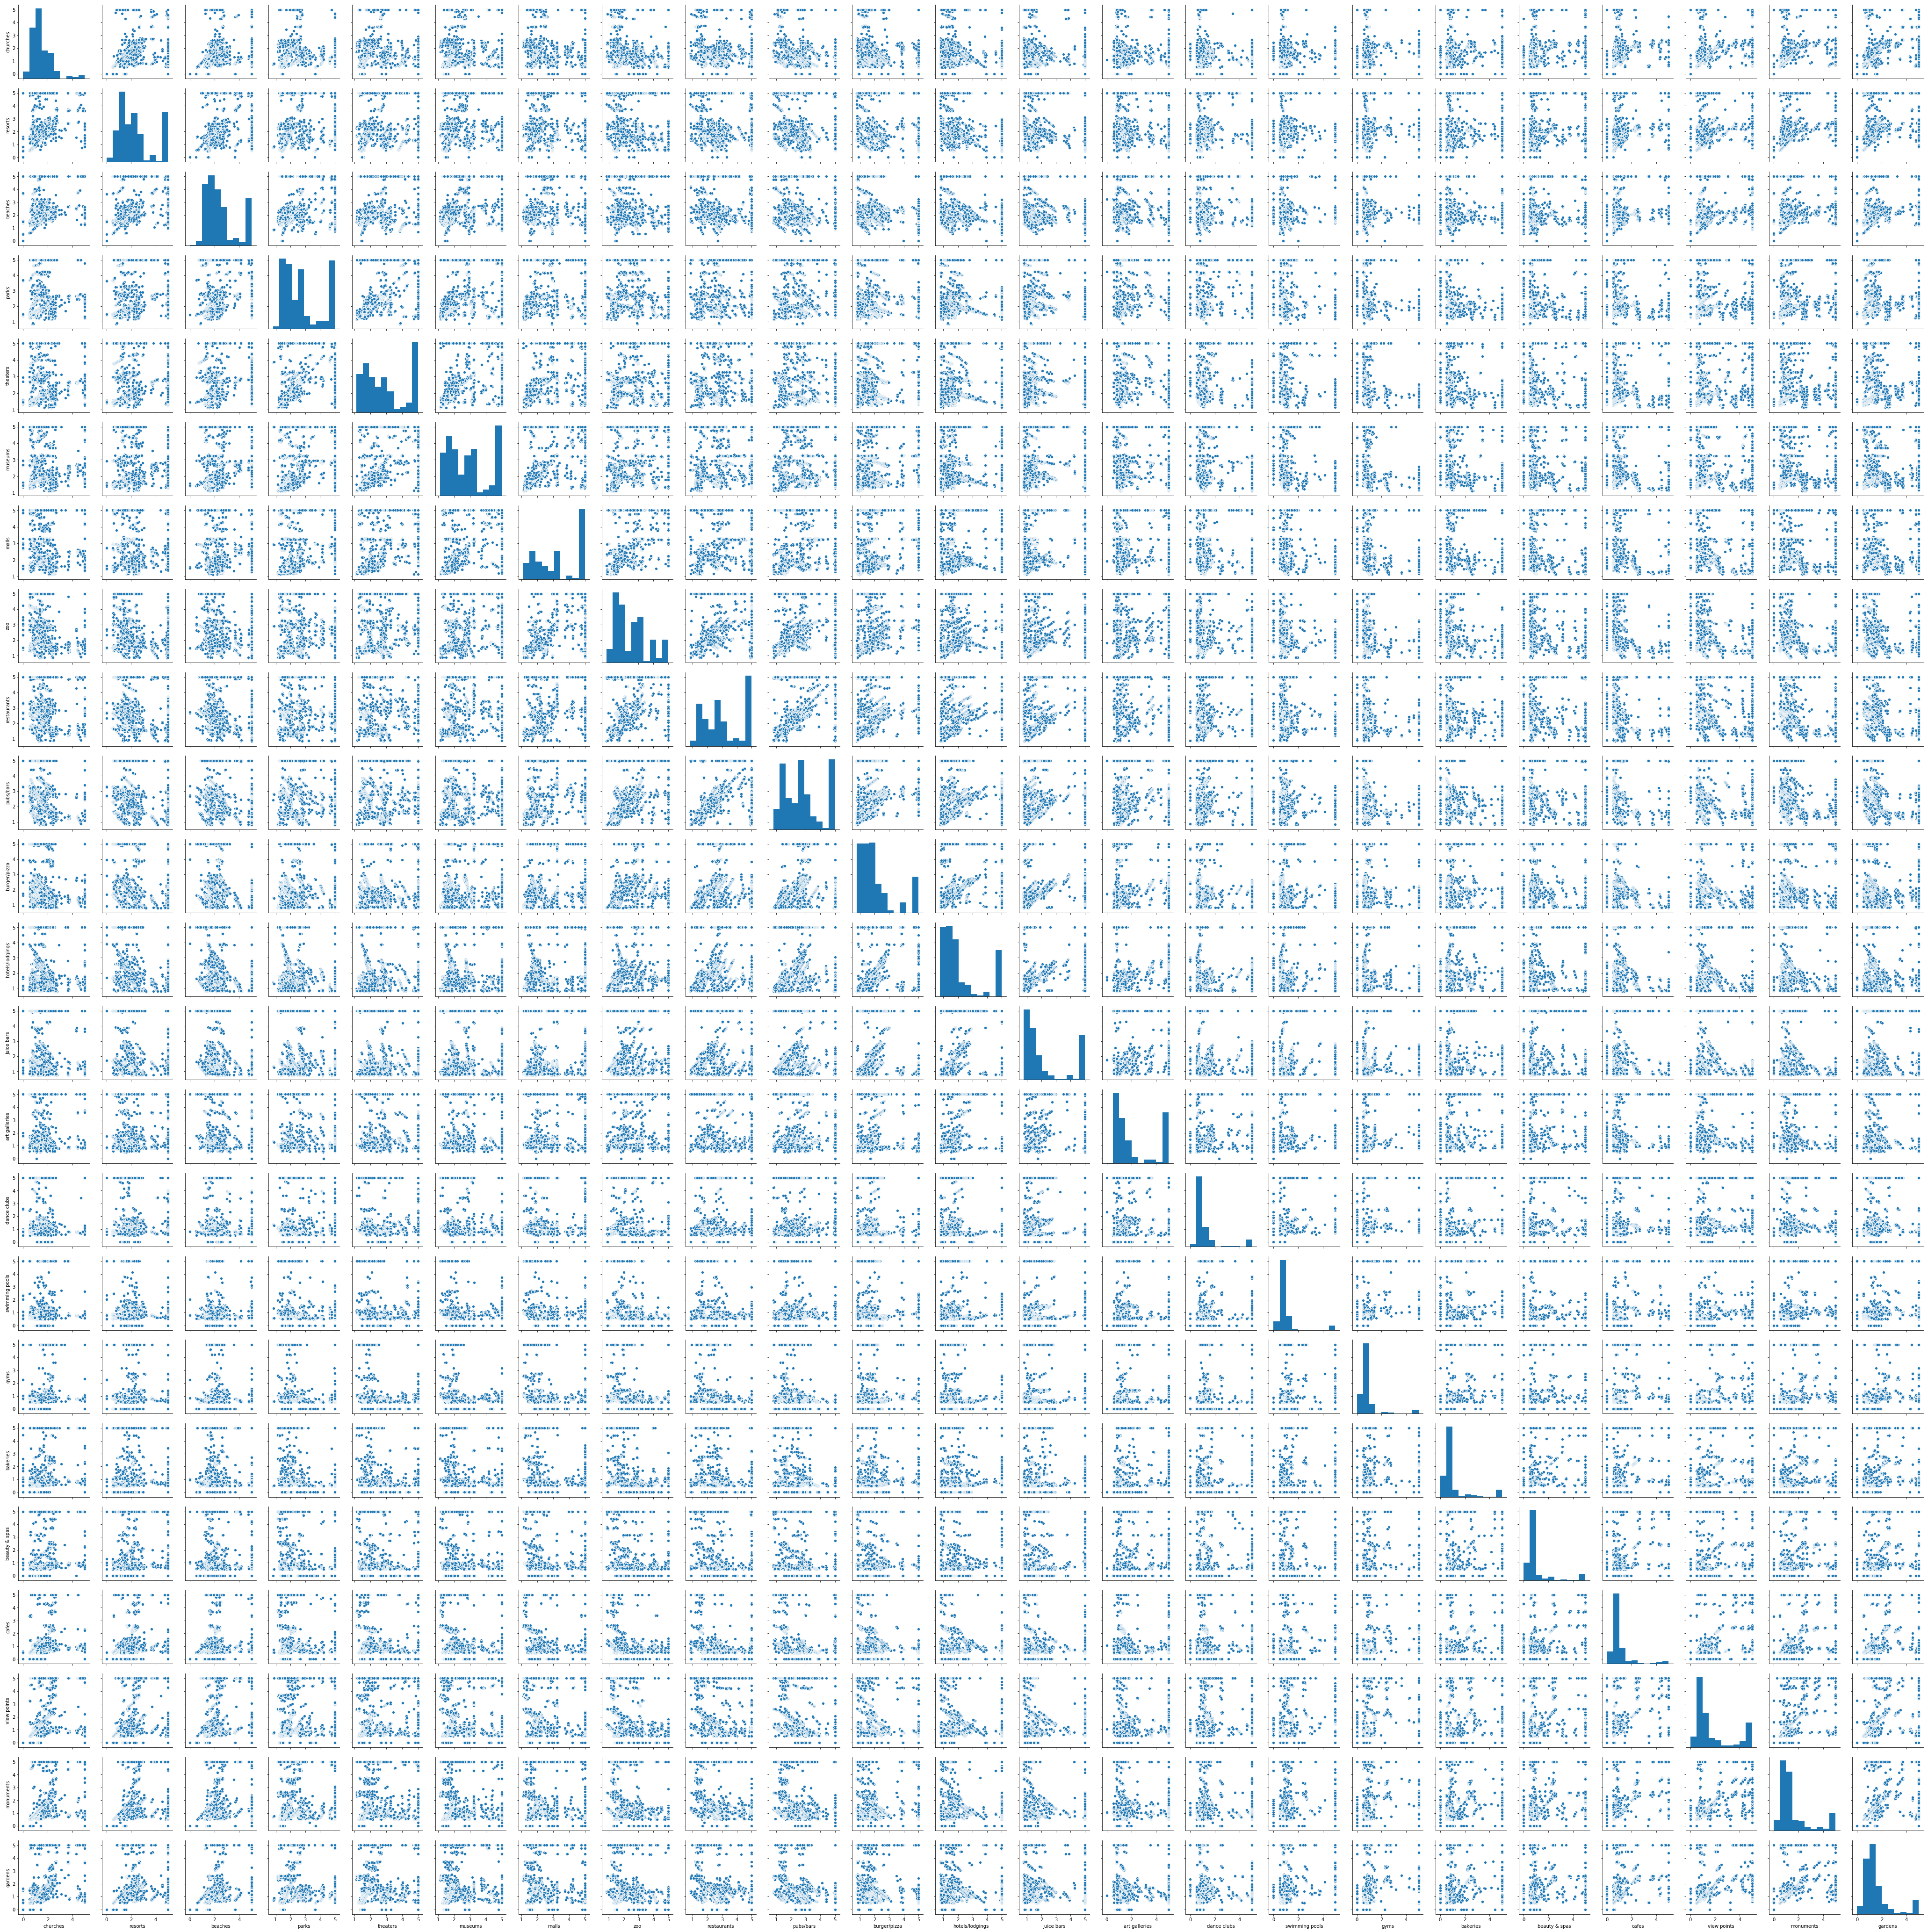

In [90]:
sns.pairplot(df)

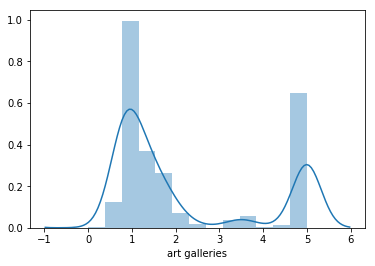

In [104]:
sns.distplot(df['art galleries'])

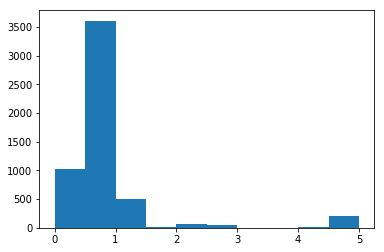

In [103]:
plt.hist(df['gyms'])
plt.show()

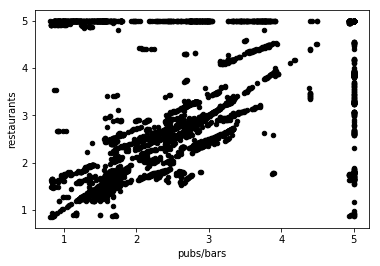

In [107]:
df.plot.scatter(x='pubs/bars', y='restaurants', c='k')

## Stretch Goals - Other types and sources of data

Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.